In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
%cd '/content/drive/My Drive/Cursos_Y_Proyectos/Manipulacion_de_datos_con_pandas/'

/content/drive/My Drive/Cursos_Y_Proyectos/Manipulacion_de_datos_con_pandas


In [5]:
!ls

10_group_by.ipynb			     5_math.ipynb
11_duplicated.ipynb			     6_multi-index.ipynb
12_groupby_2.ipynb			     7_with_text.ipynb
13_datetime.ipynb			     8_concat_append.ipynb
1_pandas_series_e_indexacion_de_datos.ipynb  8_merge.ipynb
2_pruebas_dataframes.ipynb		     9_NaN.ipynb
3_save_and_load.ipynb			     db
4_datatypes.ipynb


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('db/covid_19_data.csv')
df.head()
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [11]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [13]:
df = df[['ObservationDate','Country/Region','Confirmed','Deaths','Recovered']]

df.sample(10)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
37632,2020-06-08,US,11476.0,472.0,0.0
64079,2020-07-14,India,1524.0,0.0,0.0
83679,2020-08-10,Mexico,5972.0,953.0,4853.0
52934,2020-06-29,Mexico,5568.0,441.0,4643.0
43373,2020-06-16,Peru,2726.0,46.0,0.0
27769,2020-05-22,Sudan,3378.0,137.0,372.0
63197,2020-07-13,Chile,8487.0,123.0,6887.0
54810,2020-07-02,Togo,667.0,14.0,424.0
34067,2020-06-03,Mainland China,991.0,6.0,985.0
3309,2020-03-04,US,10.0,0.0,0.0


In [15]:
df_time = df.groupby('ObservationDate').sum()
df_time.sample(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-07-10,12498467.0,560209.0,6879521.0
2020-04-29,3193886.0,227638.0,972719.0
2020-02-14,66887.0,1523.0,8058.0
2020-05-06,3755341.0,263831.0,1245413.0
2020-05-19,4897492.0,323285.0,1838995.0
2020-07-17,14055299.0,596518.0,7894890.0
2020-04-15,2056055.0,134177.0,511019.0
2020-06-11,7514481.0,421458.0,3540696.0
2020-06-16,8173940.0,443685.0,3955169.0


In [16]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [17]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [18]:
df1-df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [19]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-18,22137926.0,780908.0,14116451.0
2020-08-19,22411300.0,787672.0,14333914.0
2020-08-20,22678483.0,793698.0,14541573.0


In [20]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-18,256068.0,6874.0,228150.0
2020-08-19,273374.0,6764.0,217463.0
2020-08-20,267183.0,6026.0,207659.0


In [21]:
df_time.diff().mean()

Confirmed    108934.164319
Deaths         3776.521127
Recovered     70006.061033
dtype: float64

In [22]:
df_diff = df_time.diff()

In [23]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [24]:
df_diff.fillna({'Confirmed': 555.0,
 'Deaths':  17.0,
 'Recovered':  28.0})

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-18,256068.0,6874.0,228150.0
2020-08-19,273374.0,6764.0,217463.0
2020-08-20,267183.0,6026.0,207659.0


In [25]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths':  17.0,
 'Recovered':  28.0})

In [26]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-08-18,256068.0,6874.0,228150.0
2020-08-19,273374.0,6764.0,217463.0
2020-08-20,267183.0,6026.0,207659.0


In [27]:
df_diff.sum()

Confirmed    23203532.0
Deaths         804416.0
Recovered    14911319.0
dtype: float64

In [28]:
#agrupar y sumar cada 7 dias
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,25738.0,1102.0,16175.0
2020-03-11,78586.0,3643.0,16436.0
2020-03-18,220794.0,10710.0,26859.0


In [30]:
#suma cada domingo 
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,21464.0,807.0,17979.0
2020-03-15,57612.0,2637.0,15339.0
2020-03-22,169675.0,8183.0,21209.0


In [31]:
#suma mensual
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,771474.0,39166.0,138246.0
2020-04-30,2399359.0,191281.0,836725.0
2020-05-31,2910100.0,138647.0,1626576.0
2020-06-30,4308892.0,139218.0,2711943.0
2020-07-31,7123998.0,168247.0,5015868.0
2020-08-31,5603696.0,124916.0,4542179.0


In [32]:
#cuantos datos hay?
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,22,22,22


In [33]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,229806.387097,5427.322581,161802.193548
2020-08-31,254713.454545,5678.000000,206462.681818


In [34]:
df_diff.resample('12h').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-08-20 00:00:00,267183.0,6026.0,207659.0
2020-08-20 12:00:00,0.0,0.0,0.0
2020-08-21 00:00:00,270751.0,5554.0,170679.0


In [39]:
#que al menos haya un elemento
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum.sample(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-08-17 12:00:00,NaN,NaN,NaN
2020-01-26 00:00:00,2118.0,56.0,52.0
2020-01-22 00:00:00,555.0,17.0,28.0
2020-07-04 12:00:00,NaN,NaN,NaN
2020-03-14 00:00:00,156099.0,5819.0,72624.0
2020-08-16 12:00:00,NaN,NaN,NaN
2020-07-07 00:00:00,11829602.0,544163.0,6447656.0
2020-04-23 00:00:00,2708885.0,190858.0,738486.0
2020-03-15 00:00:00,167447.0,6440.0,76034.0


In [40]:
#completar con valor siguiente 
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-20 00:00:00,22678483.0,793698.0,14541573.0
2020-08-20 12:00:00,22949234.0,799252.0,14712252.0
2020-08-21 00:00:00,22949234.0,799252.0,14712252.0


In [41]:
#completar con valor anterior 
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-08-20 00:00:00,22678483.0,793698.0,14541573.0
2020-08-20 12:00:00,22678483.0,793698.0,14541573.0
2020-08-21 00:00:00,22949234.0,799252.0,14712252.0


In [46]:
#interpolando los valores nulos con una media entre los otros dos que siguen y anteriores
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,NaN
2020-01-22 12:00:00,604.0,17.5,29.0,NaN
2020-01-23 00:00:00,653.0,18.0,30.0,NaN
2020-01-23 12:00:00,797.0,22.0,33.0,NaN
2020-01-24 00:00:00,941.0,26.0,36.0,NaN
...,...,...,...,...
2020-08-20 00:00:00,22678483.0,793698.0,14541573.0,NaN
2020-08-20 12:00:00,22813858.5,796475.0,14626912.5,NaN
2020-08-21 00:00:00,22949234.0,799252.0,14712252.0,NaN


In [48]:
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-08-20 00:00:00,22678483.0,793698.0,14541573.0,0.965002
2020-08-20 12:00:00,22813858.5,796475.0,14626912.5,0.965088
2020-08-21 00:00:00,22949234.0,799252.0,14712252.0,0.965173


In [49]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
422,2020-08-20 00:00:00,22678483.0,793698.0,14541573.0,0.965002
423,2020-08-20 12:00:00,22813858.5,796475.0,14626912.5,0.965088
424,2020-08-21 00:00:00,22949234.0,799252.0,14712252.0,0.965173
425,2020-08-21 12:00:00,23076383.0,801834.0,14811785.5,0.965253


In [50]:
#haciendo groupby, cuando no es columna indice, el tiempo
df_cum.groupby(pd.Grouper(key='ObservationDate', freq='M'))['rate'].mean()

ObservationDate
2020-01-31    0.974594
2020-02-29    0.973562
2020-03-31    0.960070
2020-04-30    0.936029
2020-05-31    0.933422
2020-06-30    0.945713
2020-07-31    0.957037
2020-08-31    0.963544
Freq: M, Name: rate, dtype: float64

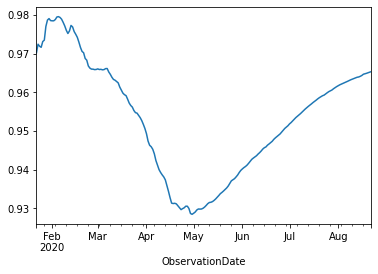

In [74]:
#cambio a frecuencia diaria, y guardo en una variable

sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

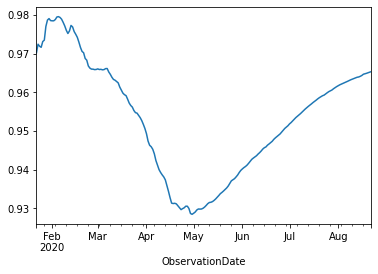

In [75]:
#grafico tasa de superviviencia
sr.plot()

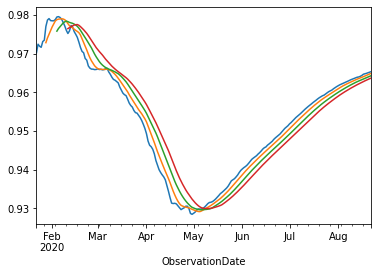

In [81]:


sr.rolling(window=1).mean().plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()
sr.rolling(window=21).mean().plot()

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

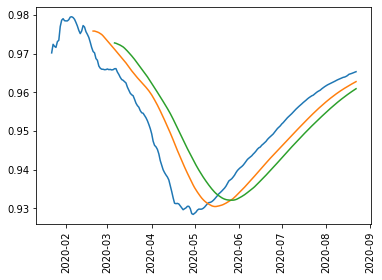

In [80]:
plt.plot(sr)
plt.plot(sr.rolling(window = 30).mean())
plt.plot(sr.rolling(window = 45).mean())
plt.xticks(rotation = '90')

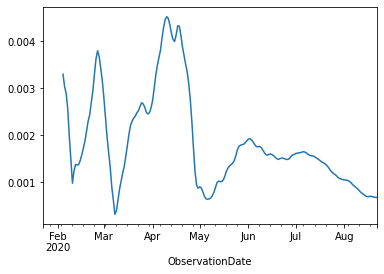

In [78]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()


In [82]:
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


In [83]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Brazil             749244.0
India              671942.0
US                 664435.0
South Africa       607045.0
Russia             405843.0
                     ...   
Gambia, The             1.0
East Timor              1.0
Curacao                 1.0
Channel Islands         1.0
 Azerbaijan             1.0
Name: Confirmed, Length: 223, dtype: float64

In [84]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate', freq ='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[32751 rows x 3 columns]

In [86]:
df_arg = df_time.loc['Argentina', :]
df_arg

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,1.0,0.0,0.0
2020-03-06,2.0,0.0,0.0
2020-03-07,8.0,0.0,0.0
...,...,...,...
2020-08-18,305966.0,6048.0,223531.0
2020-08-19,312659.0,6330.0,228725.0
2020-08-20,320884.0,6517.0,233651.0


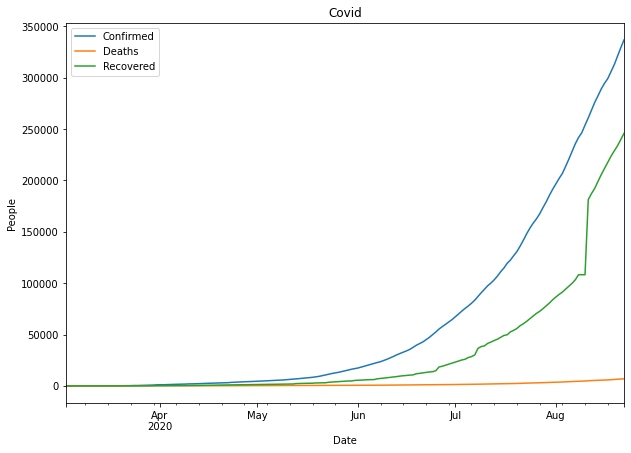

In [88]:
df_arg.plot(figsize=(10,7), title='Covid')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

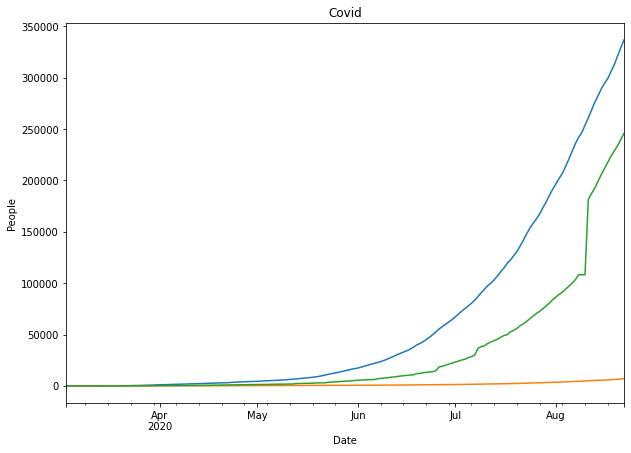

In [89]:
df_arg.plot(figsize=(10,7), title='Covid', legend=False)
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

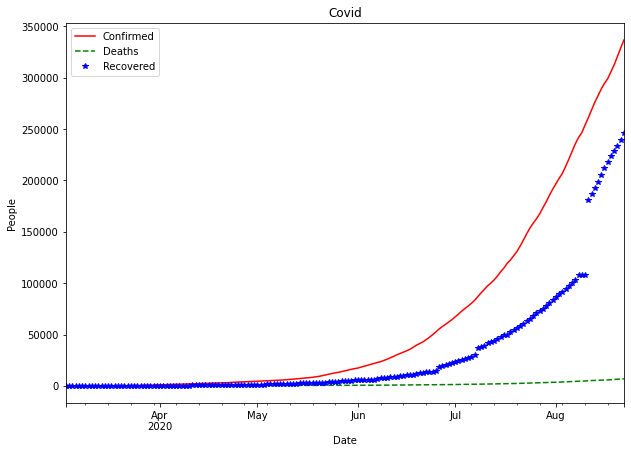

In [92]:
df_arg.plot(figsize=(10,7), title='Covid', style=['r-','g--','b*'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [100]:
df_monthly = df_arg.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-31,1054.0,27.0,240.0
2020-04-30,4428.0,218.0,1256.0
2020-05-31,16851.0,539.0,5336.0
2020-06-30,64530.0,1307.0,22028.0
2020-07-31,191302.0,3543.0,83780.0
2020-08-31,336802.0,6848.0,245781.0


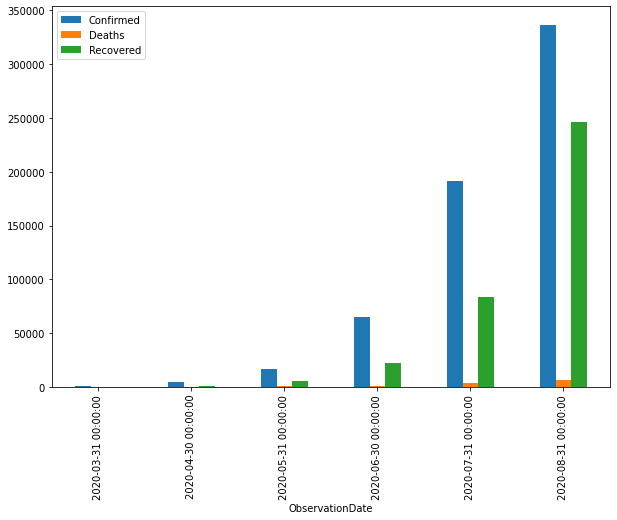

In [101]:
df_monthly.plot(figsize = (10,7), kind='bar')

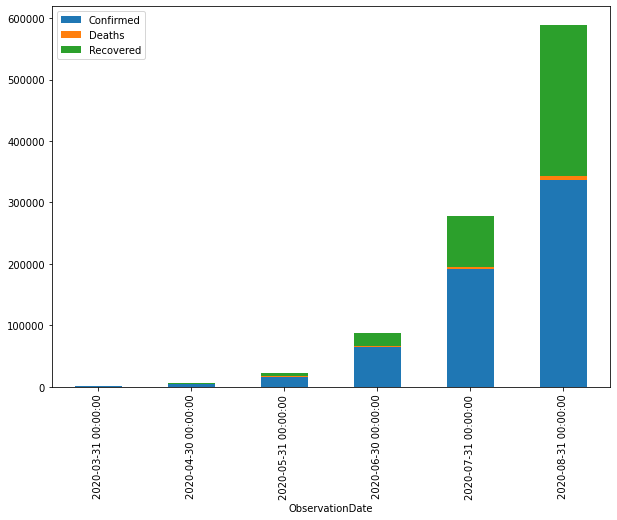

In [102]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked=True)

In [103]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-03-31,1054.0,27.0,240.0,787.0
2020-04-30,4428.0,218.0,1256.0,2954.0
2020-05-31,16851.0,539.0,5336.0,10976.0
2020-06-30,64530.0,1307.0,22028.0,41195.0
2020-07-31,191302.0,3543.0,83780.0,103979.0
2020-08-31,336802.0,6848.0,245781.0,84173.0


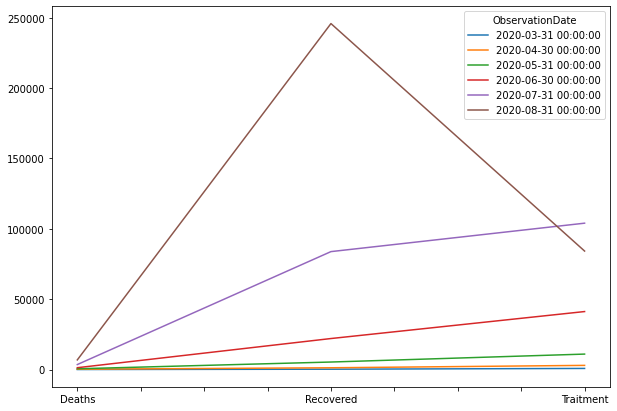

In [106]:
df_monthly[['Deaths','Recovered', 'Traitment']].T.plot(figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f449a7ee7b8>,
      dtype=object)

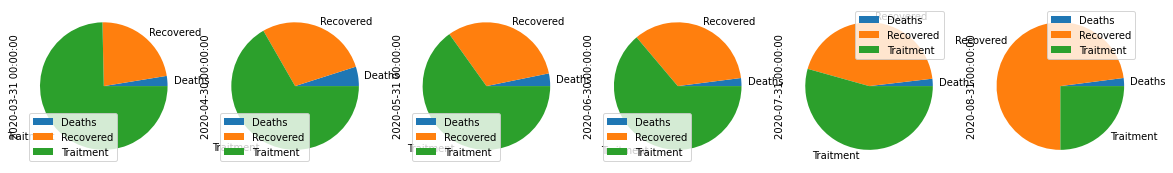

In [108]:
df_monthly[['Deaths','Recovered', 'Traitment']].T.plot(figsize=(20,15), kind='pie', subplots=True)

In [110]:
df_arg.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,1.0,0.0,0.0
2020-03-06,2.0,0.0,0.0
2020-03-07,8.0,0.0,0.0


In [112]:
df_arg['rate'] = 1 - df_arg['Deaths'] / df_arg['Confirmed']


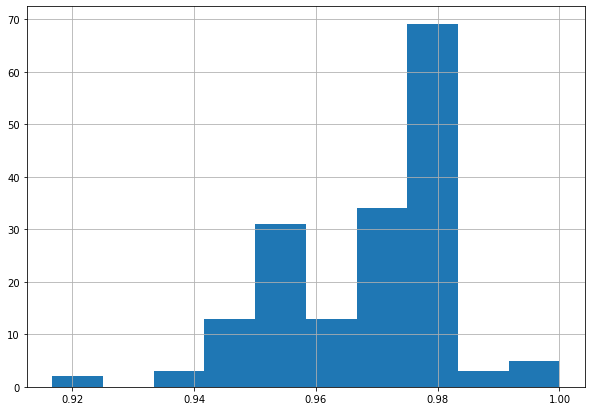

In [113]:
df_arg['rate'].hist(figsize=(10,7), bins = 10)

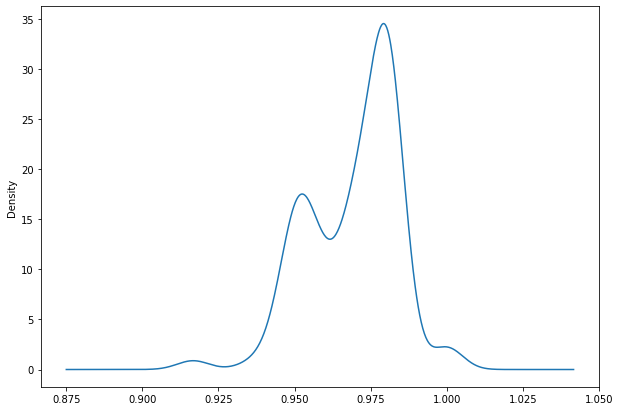

In [116]:
df_arg['rate'].plot(kind='kde',figsize=(10,7))

In [117]:
df_time.loc['Argentina', :].head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,1.0,0.0,0.0
2020-03-06,2.0,0.0,0.0
2020-03-07,8.0,0.0,0.0


In [118]:
df_time.loc['Brazil', :].head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,2.0,0.0,0.0


In [122]:
df_time.loc['US', :].head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,5.0,0.0,0.0


In [123]:
df_time.loc['Chile', :].head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,4.0,0.0,0.0
2020-03-06,4.0,0.0,0.0
2020-03-07,4.0,0.0,0.0


In [124]:
df_time.loc['Uruguay', :].head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-14,4.0,0.0,0.0
2020-03-15,4.0,0.0,0.0
2020-03-16,8.0,0.0,0.0
2020-03-17,29.0,0.0,0.0
2020-03-18,50.0,0.0,0.0


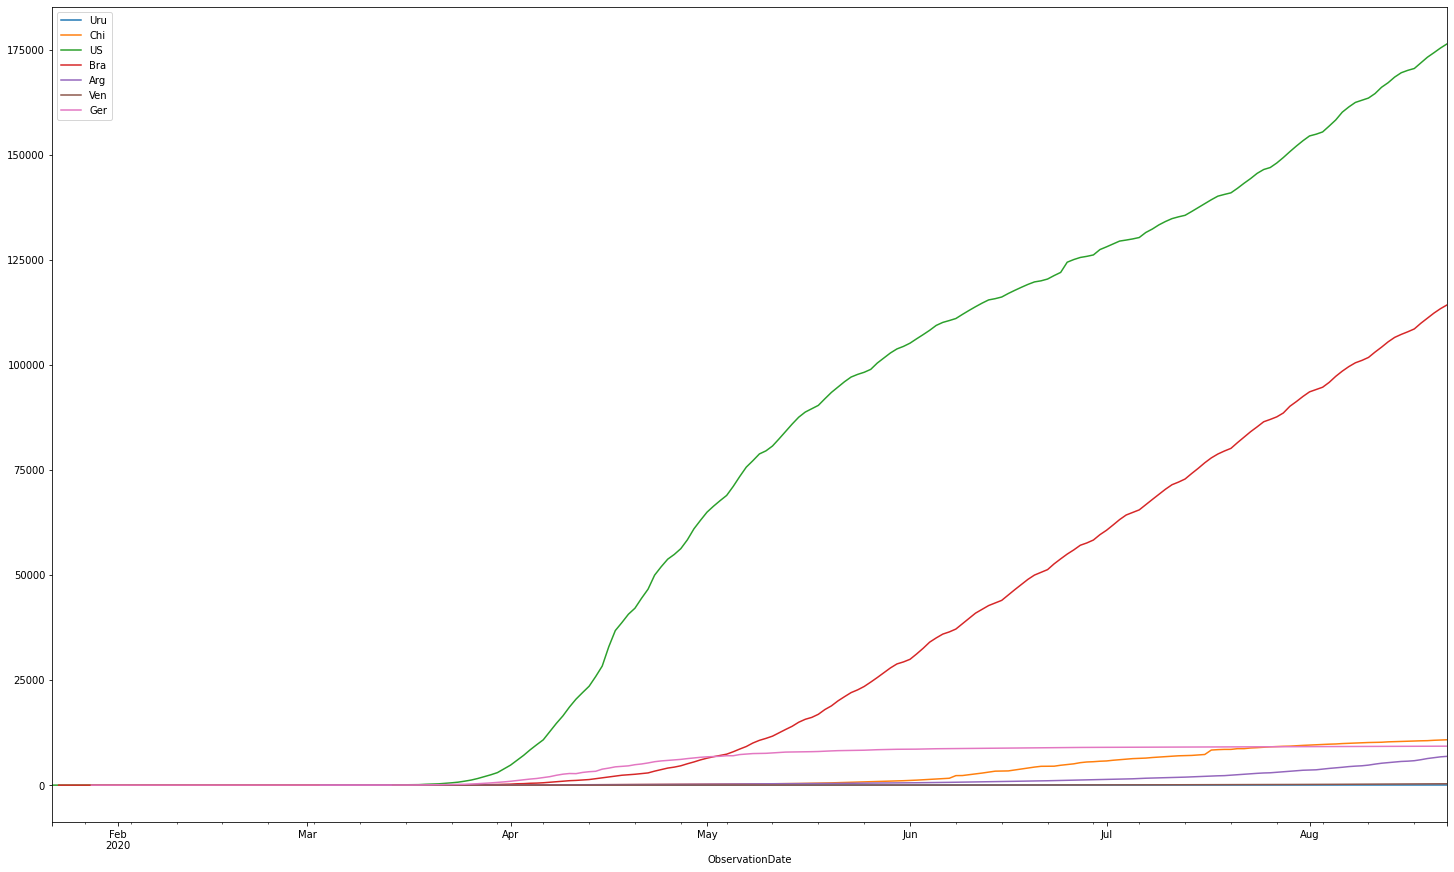

In [142]:

df_time.loc['Uruguay', :]['Deaths'].plot(legend=True, label='Uru',figsize=(25,15))
df_time.loc['Chile', :]['Deaths'].plot(legend=True, label='Chi')
df_time.loc['US', :]['Deaths'].plot(legend=True, label='US')
df_time.loc['Brazil', :]['Deaths'].plot(legend=True, label='Bra')
df_time.loc['Argentina', :]['Deaths'].plot(legend=True, label='Arg')
df_time.loc['Venezuela', :]['Deaths'].plot(legend=True, label='Ven')
df_time.loc['Germany', :]['Deaths'].plot(legend=True, label='Ger')

In [137]:
df_time.loc['Germany', :]

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-28,4.0,0.0,0.0
2020-01-29,4.0,0.0,0.0
2020-01-30,4.0,0.0,0.0
2020-01-31,5.0,0.0,0.0
2020-02-01,8.0,0.0,0.0
...,...,...,...
2020-08-18,228120.0,9241.0,203677.0
2020-08-19,229706.0,9249.0,204454.0
2020-08-20,231292.0,9263.0,205359.0
